<a href="https://colab.research.google.com/github/HoanDiep/BT8_tuan9/blob/main/fashionMnist_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from keras.callbacks import ModelCheckpoint
from keras.datasets import fashion_mnist
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.utils import np_utils

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train.shape


(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

<function matplotlib.pyplot.show(close=None, block=None)>

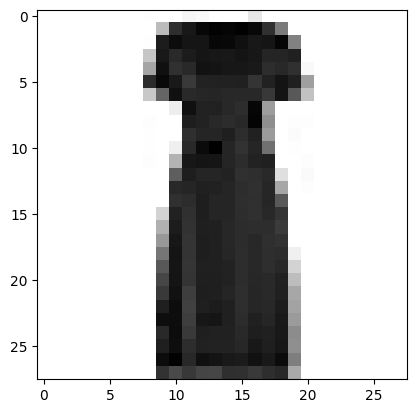

In [5]:
import matplotlib.pyplot as plt

hinh = X_train[50]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show

In [6]:
X_train = X_train.reshape(X_train.shape[0], 784)
print(X_train.shape[0])
X_test = X_test.reshape(X_test.shape[0], 784)
print(X_test.shape[0])
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

60000
10000
Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [7]:
X_train /= 255
X_test /= 255

In [8]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
model = Sequential() # Khai báo mô hình tuần tự 
model.add(Dense(512, input_shape=(784,))) 
                                       
model.add(Activation('relu'))
model.add(Dropout(0.2)) 
model.add(Dense(512)) 
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax')) 

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:

filepath="mlp-weights.{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

history = model.fit(X_train, Y_train,batch_size=128, epochs=25,verbose=1,validation_data=(X_test,Y_test))


Epoch 1/25
469/469 [==============================] - 9s 19ms/step - loss: 0.3893 - accuracy: 0.8572 - val_loss: 0.3653 - val_accuracy: 0.8653
Epoch 2/25
469/469 [==============================] - 10s 20ms/step - loss: 0.3521 - accuracy: 0.8703 - val_loss: 0.3591 - val_accuracy: 0.8697
Epoch 3/25
469/469 [==============================] - 7s 16ms/step - loss: 0.3272 - accuracy: 0.8784 - val_loss: 0.3681 - val_accuracy: 0.8657
Epoch 4/25
469/469 [==============================] - 8s 18ms/step - loss: 0.3126 - accuracy: 0.8830 - val_loss: 0.3497 - val_accuracy: 0.8698
Epoch 5/25
469/469 [==============================] - 8s 17ms/step - loss: 0.2978 - accuracy: 0.8897 - val_loss: 0.3328 - val_accuracy: 0.8774
Epoch 6/25
469/469 [==============================] - 8s 16ms/step - loss: 0.2877 - accuracy: 0.8921 - val_loss: 0.3273 - val_accuracy: 0.8820
Epoch 7/25
469/469 [==============================] - 8s 18ms/step - loss: 0.2778 - accuracy: 0.8960 - val_loss: 0.3390 - val_accuracy: 0.873

In [13]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('test_accuracy',test_acc)
print('test_loss:',test_loss)

313/313 [==============================] - 1s 4ms/step - loss: 0.3174 - accuracy: 0.8957
test_accuracy 0.8956999778747559
test_loss: 0.3174291253089905
